In [8]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter



from sklearn.metrics import classification_report, confusion_matrix
import h5py
import time

import os
from dotenv import load_dotenv

load_dotenv()

from data_manipulation.reading_util import load_all_sub_classes


In [9]:
EC_TO_LABEL = {
    "1.1": 0,
    "1.2": 1,
    "1.3": 2,
    "1.4": 3,
    "1.5": 4,
    "1.6": 5,
    "1.7": 6,
    "1.8": 7,
    "1.11": 8,
    "1.12": 9,
    "1.13": 10,
    "1.14": 11,
    "1.15": 12,
    "1.16": 13,
    "1.17": 14,
    "1.18": 15,
    "1.21": 16,
    "1.10": 17,
    "1.20": 17,
    "1.23": 17,
    "1.97": 17,
    "2.1": 18,
    "2.3": 19,
    "2.4": 20,
    "2.5": 21,
    "2.6": 22,
    "2.7": 23,
    "2.8": 24,
    "2.2": 25,
    "2.9": 25,
    "2.10": 25,
    "3.1": 26,
    "3.2": 27,
    "3.4": 28,
    "3.5": 29,
    "3.6": 30,
    "3.3": 31,
    "3.7": 31,
    "3.8": 31,
    "3.9": 31,
    "3.11": 31,
    "3.13": 31,
    "4.1": 32,
    "4.2": 33,
    "4.3": 34,
    "4.4": 35,
    "4.6": 36,
    "4.99": 37,
    "4.7": 37,
    "4.5": 37,
    "5.1": 38,
    "5.2": 39,
    "5.3": 40,
    "5.4": 41,
    "5.5": 42,
    "5.6": 43,
    "5.7": 43,
    "5.99": 43,
    "6.1": 44,
    "6.2": 45,
    "6.3": 46,
    "6.5": 47,
    "6.4": 47,
    "6.6": 47,
    "7.1": 48,
    "7.2": 49,
    "7.3": 50,
    "7.4": 50,
    "7.5": 50,
    "7.6": 50,
}



In [4]:
emb_path = os.getenv("ESM2_ENZYMES_SPLIT_10")
csv_path = os.getenv("CSV10_ENZYMES")

X, y, label_to_sec = load_all_sub_classes(emb_path, csv_path, allowed_labels=EC_TO_LABEL)

In [32]:
def make_prediction(y):

    count_dict = Counter(y)
    predictions = []

    for key in count_dict.keys():
        count_dict[key] = count_dict[key] / len(y)
        
    for _ in y:    
        predicted_label = random.choices(list(count_dict.keys()), weights=count_dict.values())[0]
        predictions.append(predicted_label)
    
    counter = 0
    
    for pred_label, true_label in zip(predictions, y):
        if pred_label == true_label:
            counter+=1
            
    print(f"Correctly classified {counter} samples of {len(y)}")


    report = classification_report(y, predictions, zero_division=0)
    print(report)

    conf_matrix = confusion_matrix(y, predictions)
    row_sums = conf_matrix.sum(axis=1)
    conf_matrix_percent = (conf_matrix.T / row_sums).T * 100

    # Create a confusion matrix heatmap
    plt.figure(figsize=(10, 7))

    # Plot the heatmap with percentwise coloring
    heatmap = sns.heatmap(conf_matrix_percent, annot=False, fmt=".2f", cmap="binary", cbar=False)

    # Remove x and y tick labels
    heatmap.set_xticks([])
    heatmap.set_yticks([])

    plt.xlabel("Predicted", fontsize=12)
    plt.ylabel("Actual", fontsize=12)

    plt.title("Confusion Matrix (Percentwise Color)", fontsize=12)
    plt.show()





Correctly classified 566 samples of 7212
              precision    recall  f1-score   support

           0       0.03      0.03      0.03       140
           1       0.02      0.02      0.02        52
           2       0.02      0.02      0.02        96
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00        61
           5       0.00      0.00      0.00        16
           6       0.00      0.00      0.00        31
           7       0.00      0.00      0.00        61
           8       0.00      0.00      0.00        42
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00        54
          11       0.02      0.02      0.02       181
          12       0.00      0.00      0.00        18
          13       0.00      0.00      0.00        19
          14       0.00      0.00      0.00        40
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0

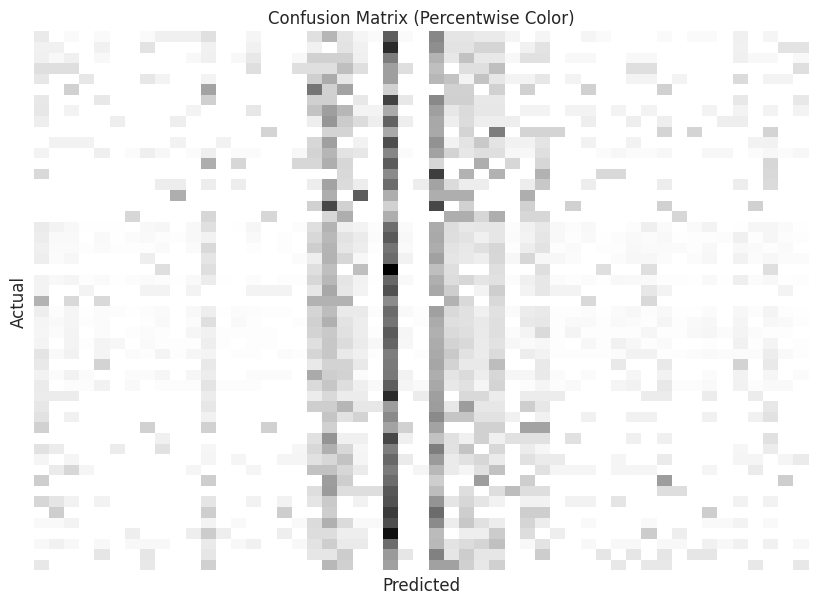

In [33]:
make_prediction(y)